This script tests load_data.ipynb.

It runs some examples to double check that the scripts is working correctly.

In [1]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os

import get_halpha_SB

%matplotlib inline

In [2]:
%run 'load_data.ipynb'

machine = 'coho'

### Example 1
Load data from a specific machine (specified so that the data location is known), with a specific resolution and distance.

In [3]:
distance = '50Mpc'; resolution = 100
data_tuple = loaddata(machine=machine,resolution=resolution,distance=distance)
data = data_tuple[0]

Loading data of slicewidth 5 (after rounding), number of slices is 1
./intermediatedata/data_50Mpc_100arcsec_5slwd.npz does not exist, making it now...
Creating data of slicewidth 5 Mpc (./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5slice_zcen12.5_total.npz does not yet exist)...
First slice: index 1 of 1
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5_noSFR.npz)...
Loading SF data second (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5__fromSFR.npz)...
Adding together to make a 5 Mpc slice...
Deleting intermediate files: noSF data, SF data...
Saving the summed data in ./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5slice_zcen12.5_total.npz...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 8.0.
DEBUGGING: data_tu

The type of size is <type 'float'>


(4000, 4000)

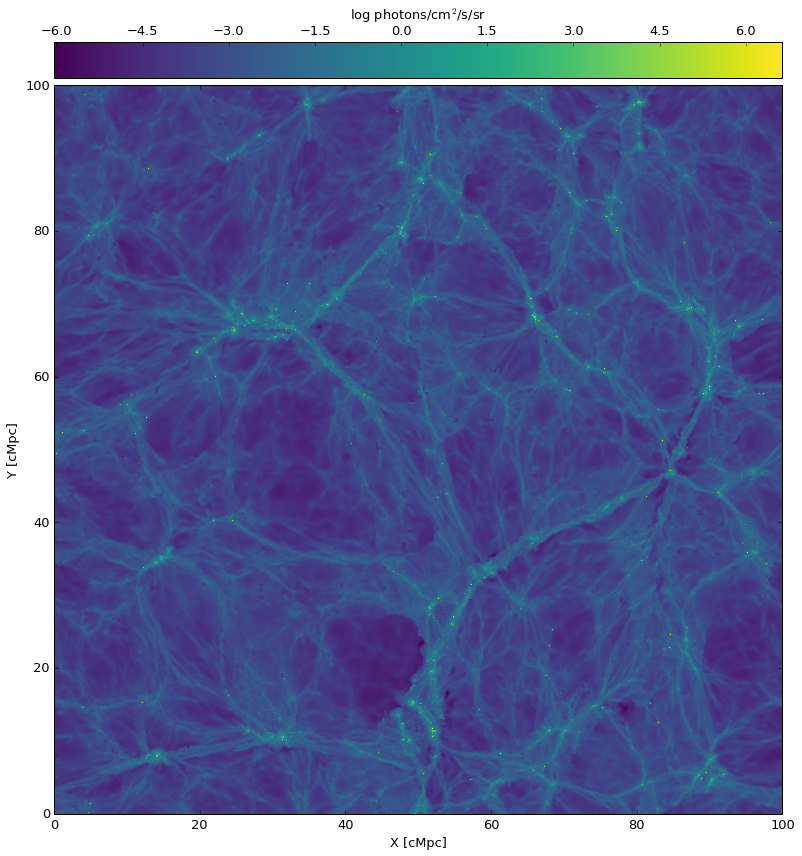

In [6]:
fig = plt.figure(figsize=(12, 12)); ax = fig.add_subplot(111)

#data = data_tuple_100[0]; newsize = data_tuple_100[1]; factor = data_tuple_100[2];
size = 100.; xystarts = [0,0]

get_halpha_SB.makemap(data,size,ax,xystarts = xystarts)
plt.tight_layout()

data.shape

### Example 2
Load data from a specific machine with no other specifications.
This automatically loads a 5Mpc slice width of the full resolution and at 0Mpc distance away.

In [4]:
data_tuple = loaddata(machine=machine)
data = data_tuple[0]

Loading a 5Mpc slice of data...
Data exists, loading emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5_total.npz now...


### Example 3
Load data of a 20 Mpc slice width, from a specific machine, at a distance of 50Mpc, with 100 arcsec resolution.

The following takes ~30 minutes to run on my laptop if you do not have the final reduced data, so be warned!

In [7]:
distance = '50Mpc'; resolution = 100; slicewidth = 20
data_tuple = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_50Mpc_100arcsec_20slwd.npz does not exist, making it now...
Creating data of slicewidth 20 Mpc (./intermediatedata/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz does not yet exist)...
First slice: index 1 of 4
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_5.000000slice_zcen12.5_noSFR.npz)...


KeyboardInterrupt: 

In [26]:
data=data_tuple[0]
data.shape

(4000, 4000)

### Example 4
Same as example 3, but with different distances.

In [9]:
#distance = '50Mpc'; resolution = 14.; slicewidth = 20
#data_tuple_50 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

distance = '100Mpc'; resolution = 14.; slicewidth = 20
data_tuple_100 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

distance = '200Mpc'
data_tuple_200 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

distance = '500Mpc'
data_tuple_500 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)

Loading data of slicewidth 20 (after rounding), number of slices is 4
data_100Mpc_14arcsec_20slwd.npz does not exist, making it now...
Data exists, loading emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
Will reduce resolution by a factor of 2.0.
DEBUGGING: data_tuple is: 
(array([[-2.62121296, -2.63004279, -2.63720584, ..., -2.58693981,
        -2.59909916, -2.61074543],
       [-2.61393189, -2.62255311, -2.62946606, ..., -2.58053303,
        -2.59231758, -2.60368395],
       [-2.60786104, -2.61631012, -2.62302351, ..., -2.57535148,
        -2.58678794, -2.59783769],
       ..., 
       [-2.6496737 , -2.65912008, -2.66704822, ..., -2.61340952,
        -2.62655663, -2.63876915],
       [-2.63936329, -2.64863563, -2.65635538, ..., -2.60366869,
        -2.61650991, -2.62856436],
       [-2.6297636 , -2.63881683, -2.64625716, ..., -2.59473562,
        -2.60724735, -2.61911488]], dtype=float3

In [12]:
distance = '50Mpc'; resolution = 14; slicewidth = 20
data_tuple_50 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)


Loading data of slicewidth 20 (after rounding), number of slices is 4


In [13]:
data_tuple_50

(array([[-13.55241013, -13.55892658, -13.5649395 , ..., -13.53071022,
         -13.53818321, -13.54545975],
        [-13.55206394, -13.55818176, -13.56377792, ..., -13.53147316,
         -13.53858566, -13.54549503],
        [-13.552248  , -13.55794525, -13.56310844, ..., -13.53287697,
         -13.53958988, -13.54609299],
        ..., 
        [-13.55694866, -13.56449413, -13.57161903, ..., -13.53250217,
         -13.54086399, -13.54904366],
        [-13.55484104, -13.56207275, -13.56885147, ..., -13.5312233 ,
         -13.53931808, -13.547225  ],
        [-13.55332947, -13.5602169 , -13.56662464, ..., -13.5306263 ,
         -13.53842449, -13.546031  ]], dtype=float32), 32000.0, 1.0)

### Example:  Plotting the data, now that it's loaded!

The type of size is <type 'float'>
is this working?


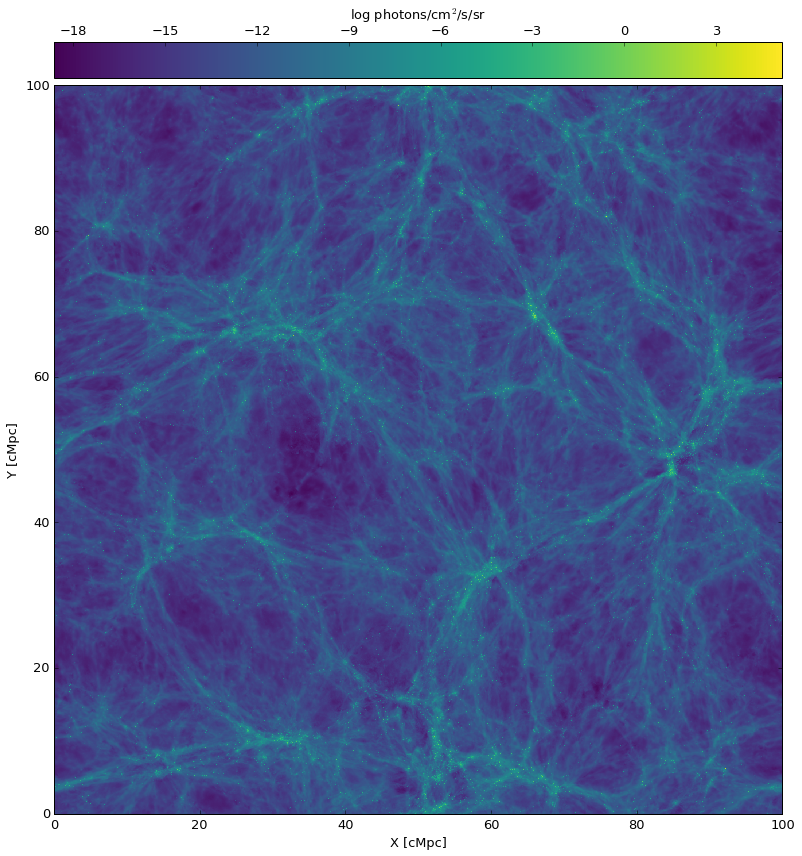

In [6]:
fig = plt.figure(figsize=(12, 12)); ax = fig.add_subplot(111)

data = data_tuple_100[0]; newsize = data_tuple_100[1]; factor = data_tuple_100[2];
size = 100.; xystarts = [0,0]

get_halpha_SB.makemap(data,size,ax,xystarts = xystarts)
plt.tight_layout()

### Loading the resolution 14 arcsec, distance 50Mpc -- full res of EAGLE data

In [10]:
#total_fname = 'data_50Mpc_14arcsec_20slwd.npz'  # copied over from emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz
#sl = [slice(None,None,None), slice(None,None,None)]
#data = (np.load(total_fname)['arr_0'])[sl]
#data_tuple = (data,32000,1)
##np.savez(total_fname,data) ### Seems to by a python issue that cannot save large numpy object arrays, cPickle breaks or something

distance = '50Mpc'; resolution = 14; slicewidth = 20
data_tuple_50 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth)


Loading data of slicewidth 20 (after rounding), number of slices is 4
data_50Mpc_14arcsec_20slwd.npz exists (and is special because cant save as tuple), loading now...


In [11]:
data_tuple_50

(array([[-2.62077141, -2.62564492, -2.63008714, ..., -2.60400987,
         -2.60988569, -2.61549926],
        [-2.61682892, -2.62165141, -2.62603831, ..., -2.60022902,
         -2.60604405, -2.61160588],
        [-2.61321568, -2.6179862 , -2.62232232, ..., -2.59680223,
         -2.60254669, -2.60804701],
        ..., 
        [-2.63436723, -2.63937879, -2.64398909, ..., -2.61722207,
         -2.62324262, -2.62897563],
        [-2.62957692, -2.63454533, -2.63909984, ..., -2.61254859,
         -2.61852527, -2.62422156],
        [-2.62503123, -2.62995315, -2.63445163, ..., -2.60813022,
         -2.61405802, -2.61971521]], dtype=float32), 32000.0, 1.0)

## Example:  use the "testing" flag

Not reducing the resolution -- closest distance, highest resolution.

In [8]:
resolution = 14.; slicewidth = 20; exptime = 1000.*60.*60.; CMOS = True; ROnoise= None; 
machine = 'coho'
x_center = 50.5; y_center = 13.5
distance = '50Mpc'
data_tuple = loaddata(machine=machine,resolution=resolution,\
                      distance=distance,slicewidth=slicewidth,testing=True)

Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/testing/data_50Mpc_14arcsec_20slwd.npz does not exist, making it now...
Creating data of slicewidth 20 Mpc (./intermediatedata/testing/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz does not yet exist)...
First slice: index 1 of 4
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/fakedata.npz)...
Loading SF data second (/Users/deblokhorst/eagle/SlicesFromNastasha/fakedata.npz)...
Adding together to make a 5 Mpc slice...
Deleting intermediate files: noSF data, SF data...
Next slice: index 1 of 4
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/fakedata.npz)...
Loading SF data second (/Users/deblokhorst/eagle/SlicesFromNastasha/fakedata.npz)...
Adding together to make a 5 Mpc slice...
Deleting intermediate files: noSF data, SF data...
Next slice: index 2 of 4
Loading noSF data first (/Users/deblokhorst/eagle/SlicesFromNastasha/

In [12]:

if machine == 'chinook':
    originaldata = np.load('/Users/deblokhorst/Eagle/fakedata.npz')['arr_0']
if machine == 'coho':
    originaldata = np.load('/Users/deblokhorst/eagle/SlicesFromNastasha/fakedata.npz')['arr_0']
print originaldata

[[-5.      -4.96875 -4.9375  ...,  4.90625  4.9375   4.96875]
 [-5.      -4.96875 -4.9375  ...,  4.90625  4.9375   4.96875]
 [-5.      -4.96875 -4.9375  ...,  4.90625  4.9375   4.96875]
 ..., 
 [-5.      -4.96875 -4.9375  ...,  4.90625  4.9375   4.96875]
 [-5.      -4.96875 -4.9375  ...,  4.90625  4.9375   4.96875]
 [-5.      -4.96875 -4.9375  ...,  4.90625  4.9375   4.96875]]


In a slicewidth of 20, we are adding 8 data arrays together (each 5 Mpc wide, on SF and one not SF).  For the testing data, we just add the same array together over and over again.

We can test that this worked correctly by just doing the logarithmic operation on a couple values and comparing it to what we should have gotten.

In [13]:
## TEST
dataout = data_tuple[0]
if dataout[0,0] == np.log10(np.sum([10**originaldata[0,0] for x in range(int(slicewidth/5. * 2.))])):
    print "Test Passed!"
else:
    print "Test Failed..."

Test Passed!


Reducing the resolution:

In [15]:
resolution = 14.; slicewidth = 20; exptime = 1000.*60.*60.; CMOS = True; ROnoise= None; 
machine = 'coho'
x_center = 50.5; y_center = 13.5
distance = '100Mpc'
data_tuple_100 = loaddata(machine=machine,resolution=resolution,\
                      distance=distance,slicewidth=slicewidth,testing=True)
print data_tuple_100[0]

Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/testing/data_100Mpc_14arcsec_20slwd.npz does not exist, making it now...
Data exists, loading ./intermediatedata/testing/emission_halpha_L0100N1504_28_test2_SmAb_C2Sm_32000pix_20slice_zcen12.5_total.npz now...
Reducing the resolution to desired distance/resolution...
TESTING IS TRUE in changeres
Will reduce resolution by a factor of 2.0.
DEBUGGING: data_tuple is: 
(array([[-4.081004, -4.018504, -3.956004, ...,  5.731496,  5.793996,
         5.856496],
       [-4.081004, -4.018504, -3.956004, ...,  5.731496,  5.793996,
         5.856496],
       [-4.081004, -4.018504, -3.956004, ...,  5.731496,  5.793996,
         5.856496],
       ..., 
       [-4.081004, -4.018504, -3.956004, ...,  5.731496,  5.793996,
         5.856496],
       [-4.081004, -4.018504, -3.956004, ...,  5.731496,  5.793996,
         5.856496],
       [-4.081004, -4.018504, -3.956004, ...,  5.731496,  5.793996,
         5.856496]]), 

In [18]:
factor = data_tuple_100[2]
print factor
originaldata_reduced = imreduce(originaldata, round(factor), log=True, method = 'average')
print originaldata_reduced

2.0
[[-4.98409398 -4.92159398 -4.85909398 ...,  4.82840602  4.89090602
   4.95340602]
 [-4.98409398 -4.92159398 -4.85909398 ...,  4.82840602  4.89090602
   4.95340602]
 [-4.98409398 -4.92159398 -4.85909398 ...,  4.82840602  4.89090602
   4.95340602]
 ..., 
 [-4.98409398 -4.92159398 -4.85909398 ...,  4.82840602  4.89090602
   4.95340602]
 [-4.98409398 -4.92159398 -4.85909398 ...,  4.82840602  4.89090602
   4.95340602]
 [-4.98409398 -4.92159398 -4.85909398 ...,  4.82840602  4.89090602
   4.95340602]]


In [19]:
## TEST
dataout = data_tuple_100[0]
if dataout[0,0] == np.log10(np.sum([10**originaldata_reduced[0,0] for x in range(int(slicewidth/5. * 2.))])):
    print "Test Passed!"
else:
    print "Test Failed..."

Test Passed!
